# Übungszettel 6: Entscheidugnsbäume, K-Nearest Neighbors (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 06.12.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

---
## Aufgabe 1:  ID3 in Python 


In dieser Aufgabe soll ein ID3 Entscheidungsbaum programmiert werden. Im Order `ID3` finden Sie Hilfsmethoden und Methoden die noch implementiert werden müssen. Schauen Sie sich den Code in den Dateien `ID3.py` und `utils.py` an. Die Klasse `SplitNode` enthält ein Attribut und Referenzen zu Kindknoten, für jeden möglichen Wert des Attributes einen. Die Klasse `PredictionNode` wird für Blattknoten verwendet und enthält lediglich die Vorhersage für den Pfad vom Wurzelknoten bis zu diesem Blatknoten.

a) Implementieren Sie folgende Methoden:

* `entropy` - berechnet die Entropie für eine Liste von Attributwerten, d.h. $ H{(S)} = \sum_{x \in X}{-p(x) \log_{2}p(x)}$, wobei $S$ die aktuelle Menge von Beispielen ist, für die Entropie berechnet wird, $X$ die Menge von Klassen in $S$ und $p(x)$ der Anteil der Klasse $x$ in $S$.
* `info_gain` - berechnet den Information Gain für ein Attribut, wenn dieses zum Splitten benutzt wird, er ist definiert als $IG(S, A) = H{(S)} - \sum_{t \in T} p(t)H{(t)}$ mit
  * $H(S)$ - Entropie der Menge $S$
  * $T$ - die Untermengen, die beim Splitten von $S$ mit Attribut $A$ entstehen, sodass $S = \bigcup_{t \in T} t$
  * $p(t)$ - Anteil der Anzahl von Elementen in $t$ von Elementen in $S$
  * $H(t)$ - Entropie der Untermenge $t$
* `get_split_attr` - liefert aus einer Liste von Attributen das Attribut mit dem höchsten Information Gain zurück
* `build_tree` - Rekursive Methode, die jeweils das beste Attribut zum Splitten auswählt und dann ggf. für die Kindknoten aufgerufen wird

In [1]:
# siehe ID3_solution.py

b) Berechnen und visualisieren Sie die Entscheidungsbäume für die Datasets `tennis.csv` und `mushrooms.csv`. Nutzen Sie dazu die Methode `tree_to_dot`, welche eine Graphrepräsentation in DOT erzeugt. Diese kann dann mit GraphViz (https://graphviz.readthedocs.io/en/stable/manual.html) visualisiert werden.

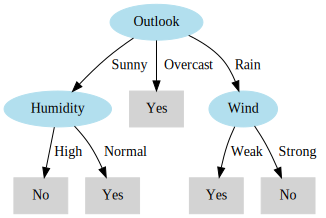

In [1]:
# !pip install graphviz
from graphviz import Source
from ID3_solution.ID3_solution import ID3
from ID3_solution.utils import tree_to_dot

id3 = ID3("tennis.csv")
tree = id3.get_tree()
g = tree_to_dot(tree)
Source(g, format='png')

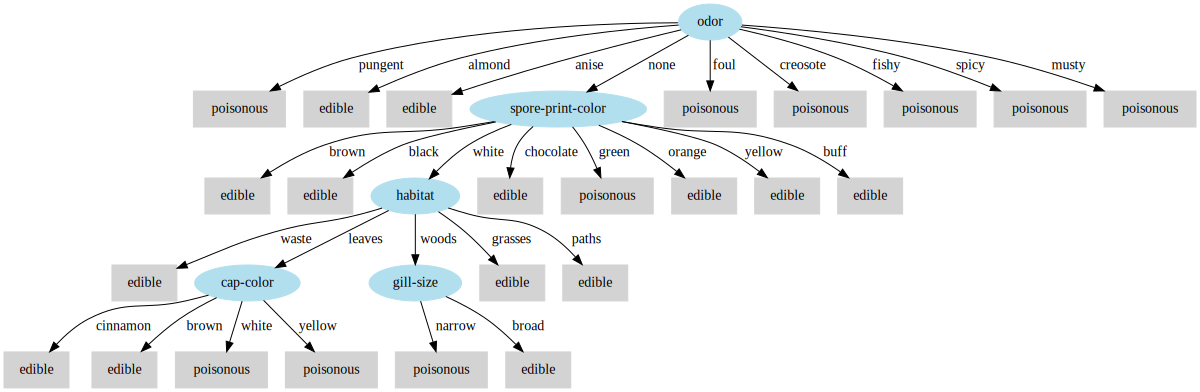

In [2]:
id3 = ID3("mushrooms.csv")
tree = id3.get_tree()
g = tree_to_dot(tree)
Source(g, format='png')

c) Implementieren Sie die Methode `predict` die den Entscheidungsbaum traversiert und ein Dictionary mit Attributname als Key und Attributwert als Value erwartet.

In [ ]:
# siehe ID3_solution.py

d) Wenden Sie die Methode an und Klassifizieren sie folgende Beispiele:

* `Outlook=Overcast,Temperature=Hot,Humidity=Normal,Wind=Strong` (`tennis.csv`)
* `odor=none, spore-print-color=white, habitat=woods, gill-size=narrow, cap-color=cinnamon` (`mushrooms.csv`)

In [3]:
id3 = ID3("tennis.csv")
id3.predict({"Outlook":"Overcast",
                    "Temperature":"Hot",
                    "Humidity":"Normal",
                    "Wind":"Strong"})

'Yes'

In [4]:
id3 = ID3("mushrooms.csv")
id3.predict({"odor":"none",
             "spore-print-color":"white",
                    "habitat":"woods",
                    "gill-size":"narrow",
                    "cap-color":"cinnamon"})

' poisonous'

---
## Aufgabe 2: Entscheidungsbäume

a) Geben Sie zu folgendem Entscheidungsbaum die Partitionierung an. Zeichnen Sie dazu ein Koordinatensystem. Geben Sie den Partitionen Bezeichner, die Sie entsprechend in den Baum übertragen.

![Baum](./task2_tree.png)

Lösung:

![Koordinatensystem](./task2_coordinateSystem.png) 

![Partitionierung im Baum](./task2_treePartitioning.png)

b) Welche Partition kann man als overfitted bezeichnen? Markieren Sie im Entscheidungsbaum die Knoten oder Teilbäume, die entfernt werden müssen, um Overfitting zu vermeiden. 

Partition $2$ kann als overfitted angesehen werden:

![Bild](./task2_treeOverfitting.png)

c) Was bedeutet die Generalisierungsfähigkeit eines Classifiers?

Generalisierungsfähigkeit bedeutet bei einem Classifier, dass er die Trainingsdaten nicht auswendig lernt und somit in der Lage ist, auch separate Testdaten auf dieser Basis korrekt zu klassifizieren.

---

## **Aufgabe 3: K-Nearest Neighbors und fehlende Werte (bewertet: 3+1,5+0,5 Punkte)**

Gegeben sei folgende Beispielmenge $V$ mit $ v_i, v_j \in V $. Dabei ist `PlayTennis` das Klassifikationsattribut:

| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D1     | Sunny    | 26           | High    | ?      | No         |
| D2     | Sunny    | 28           | High    | Strong | No         |
| D3     | Overcast | 29           | High    | Weak   | Yes        |
| D4     | Rain     | 23           | High    | Weak   | Yes        |
| D5     | Rain     | ?            | Normal  | Weak   | Yes        |
| D6     | Rain     | 12           | Normal  | Strong | No         |
| D7     | Overcast | 8            | ?       | Strong | Yes        |
| D8     | Sunny    | 25           | High    | Weak   | No         |
| D9     | Sunny    | 18           | Normal  | Weak   | Yes        |
| D10    | Rain     | 20           | Normal  | Weak   | Yes        |
| D11    | Sunny    | 20           | Normal  | Strong | ?          |
| D12    | Overcast | 21           | High    | Strong | Yes        |
| D13    | ?        | 26           | Normal  | Weak   | Yes        |
| D14    | Rain     | 24           | High    | Strong | No         |
| D15    | Sunny    | 23           | Normal  | Weak   | No         |
| D16    | Sunny    | 21           | Normal  | Weak   | Yes        |

a) Um fehlende Werte zu behandeln, kann man diese einfach auffüllen, indem man die am naheliegendsten Nachbarn zu diesem Beispiel verwendet. Benutzen Sie hierfür 3-NN zum Ausfüllen dieser Werte.

* Normieren Sie das numerische Attribut wie folgt:
  $$ \hat{v}_i = \frac{v_i - \min v_j}{\max v_j - \min v_j}$$
  
* Überlegen Sie sich eine Distanzfunktion für das numerische Attribut

* Benutzen Sie für nominale Attribute die die 0/1-Distanz
  $$ d_A(v_1,v_2) = \begin{cases}
      0, & \text{if}\ v_1=v_2 \\
      1, & \text{if}\ v_1 \neq v_2
    \end{cases} 
  $$
  
* Benutzen Sie als Distanzfunktion für 3-NN die Manhattan-Distanz auf allen normierten Attributen
 
* Beziehen Sie für das Auffüllen von Werten die Klassifikation der Beispiele mit ein

* Überlegen Sie sich, wie sie beim Auffüllen mit fehlenden Attributen in den Nachbarn umgehen

* Benutzen Sie beim Berechnen der fehlenden Attribute stets nur die ursprüngliche Beispielmenge (also ohne möglicherweise vorher aufgefüllte Attribute)

Verwenden Sie die von Ihnen ausgefüllten Werte auch für die nächsten Aufgaben. 

Wir betrachten beim Ausfüllen der fehlenden Werte eines Beispiels dessen eigene Klasse. Das heißt, wir suchen die $k$ nächsten Nachbarn des Beispieles, die zu dessen Klasse gehören. Damit ist gewährleistet, daß keine Eigenschaften einer anderen Klasse übernommen werden. Würde man fehlende Werte auffüllen, indem man Beispiele, die zu einer anderen Klasse gehören, verwendet, würde man Eigenschaften dieser Klasse verwenden, die nicht für die Klasse charakterisierend sind, zu der das Beispiel gehört.


Für numerische Attribute wird die Abstandsfunktion verwendet, da deren Funktionswerte auch im Intervall $[0, 1]$ liegen und deshalb besser mit den Abständen bei nominalen Attributen vergleichbar sind. 

Im Beispieldatensatz liegen die Werte des Attributes Temperatur zwischen 8 und 29, damit ergibt sich eine maximale Differenz von 21. Sollten später weitere Instanzen hinzukommen, deren Attributwerte nicht in dem Intervall $$[8, 29]$$ liegen, müssen die Grenzen und die maximale Differenz angepasst werden, da der normierte Wert ansonsten auch größer als 1 werden kann. Es ergibt sich folgende Abstandsfunktion:

$$ d(a_1, a_2) = \frac{|a1 − a2|}{21} $$


Die endgültige Distanzfunktion ergibt sich aus der Summe der Distanzen aller Attribute (Manhattan Distanz).

### Fehlende Werte berechnen:

**D1:**  
| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D1     | Sunny    | 26           | High    | ?      | No         |

Betrachten wir nun die Beispiele der Klasse `PlayTennis=No`, die zum Ausfüllen der Werte des Beispiels D1 benötigt werden, und berechnen deren Abstand zu D1:

| Day    |Outlook   | Temperature  |Humidity | Wind       | Distance               |
|--------|----------|--------------|---------|------------|------------------------|
| D2     | Sunny    | 28           | High    | **Strong** | $$ \frac{2}{21}$$      |
| D6     | Rain     | 12           | Normal  | Strong     | $$ 2 \frac{14}{21}$$   |
| D8     | Sunny    | 25           | High    | **Weak**   | $$ \frac{1}{21}$$      |
| D14    | Rain     | 24           | High    | **Strong** | $$ 1\frac{2}{21}$$     |
| D15    | Sunny    | 23           | Normal  | Weak       | $$ 1\frac{3}{21}$$     |


Die Beispiele D2, D8 und D14 sind die 3 nächsten Beispiele. Wir erhalten zweimal Strong und einmal Weak und setzen deshalb für D1 `Wind=Strong`.


**D5**: 
| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D5     | Rain     | ?            | Normal  | Weak   | Yes        |

Diesmal müssen wir einen numerischen Wert auffüllen. Hierfür bestimmen wir wiederum die k nächsten Nachbarn und berechnen die mittlere Distanz ihrer Attributwerte.

| Day    |Outlook   | Temperature  |Humidity | Wind   | Distance |
|--------|----------|--------------|---------|--------|----------|
| D3     | Overcast | 29           | High    | Weak   | 2        |
| D4     | Rain     | **23**       | High    | Weak   | **1**    |
| D7     | Overcast | 8            | ?       | Strong | 3        |
| D9     | Sunny    | **18**       | Normal  | Weak   | **1**    |
| D10    | Rain     | **20**       | Normal  | Weak   | **0**    |
| D12    | Overcast | 21           | High    | Strong | 3        |
| D13    | ?        | **26**       | Normal  | Weak   | **1**    |
| D16    | Sunny    | **21**       | Normal  | Weak   | **1**    |



Wie man sieht treten bei D5 zwei Probleme auf. Zum einen fehlen den Instanzen D7 und D13 auch Attributwerte, wir treffen hier die Annahme, daß sich diese (fehlenden) Attributwerte von dem von D5 unterscheiden (Abstand 1). Zum anderen können wir nicht genau 3 nächste Nachbarn bestimmen, da 5 Beispiele den Abstand 1 haben. Wir können nun einfach den Mittelwert der Attributwerte der fünf nächsten Beispiele verwenden oder einfach 3 zufällig auswählen. Wir entscheiden uns für die erste Variante, bei der wir anschließend auf die nächste ganze Zahl abrunden:

$$ \left\lfloor\frac{23 + 18 + 20 + 26 + 21}{5}\right\rfloor = \left\lfloor\frac{108}{5}\right\rfloor = 21 $$

Wir setzen für D5 also `Temperature=21`. 

**D7**: 
| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D7     | Overcast | 8            | ?       | Strong | Yes        |

Das Auffüllen der fehlende Werte erfolgt analog zu D1. Die nächsten Nachbarn sind: D12, D3, D9.

| Day    |Outlook   | Temperature  | Humidity   | Wind   | Distance              |
|--------|----------|--------------|------------|--------|-----------------------|
| D3     | Overcast | 29           | **High**   | Weak   | $$ 2 $$               |
| D4     | Rain     | 23           | High       | Weak   | $$ 2 \frac{17}{21} $$ |
| D5     | Rain     | ?            | Normal     | Weak   | $$ 3 $$               |
| D9     | Sunny    | 18           | **Normal** | Weak   | $$ 2 \frac{10}{21} $$ |
| D10    | Rain     | 20           | Normal     | Weak   | $$ 2 \frac{12}{21} $$ |
| D12    | Overcast | 21           | **High**   | Strong | $$ \frac{13}{21} $$   |
| D13    | ?        | 26           | Normal     | Weak   | $$ 2 \frac{18}{21} $$ |
| D16    | Sunny    | 21           | Normal     | Weak   | $$ 2 \frac{17}{21} $$ |

Wir setzen für D7 `Humidity=High`. 



**D13**: 
| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D13    | ?        | 26           | Normal  | Weak   | Yes        |

Das Auffüllen der fehlende Werte erfolgt analog zu D1. Die nächsten Nachbarn sind: D9, D10, D16. 

| Day    | Outlook   | Temperature  |Humidity | Wind   | Distance              |
|--------|-----------|--------------|---------|--------|-----------------------|
| D3     | Overcast  | 29           | High    | Weak   | $$ 1 \frac{3}{21} $$  |
| D4     | Rain      | 23           | High    | Weak   | $$ 1 \frac{3}{21} $$  |
| D5     | Rain      | ?            | Normal  | Weak   | $$ 1 $$               |
| D7     | Overcast  | 8            | ?       | Strong | $$ 2 \frac{14}{21} $$ |
| D9     | **Sunny** | 18           | Normal  | Weak   | $$ \frac{8}{21} $$    |
| D10    | **Rain**  | 20           | Normal  | Weak   | $$ \frac{6}{21} $$    |
| D12    | Overcast  | 21           | High    | Strong | $$ 2 \frac{5}{21} $$  |
| D16    | **Sunny** | 21           | Normal  | Weak   | $$ \frac{5}{21} $$    |


Wir setzen für D13 `Outlook=Sunny`.   



**D11**: 
| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D11    | Sunny    | 20           | Normal  | Strong | ?          |

Das Beispiel D11 entfernen wir komplett aus den Daten, da es uns keinen Nutzen für unsere Klassifikation bringt.

Damit erhalten wir den folgenden vollständigen Datensatz:

| Day    |Outlook   | Temperature  |Humidity | Wind       | PlayTennis |
|--------|----------|--------------|---------|------------|------------|
| D1     | Sunny    | 26           | High    | **Strong** | No         |
| D2     | Sunny    | 28           | High    | Strong     | No         |
| D3     | Overcast | 29           | High    | Weak       | Yes        |
| D4     | Rain     | 23           | High    | Weak       | Yes        |
| D5     | Rain     | **21**       | Normal  | Weak       | Yes        |
| D6     | Rain     | 12           | Normal  | Strong     | No         |
| D7     | Overcast | 8            | **High**| Strong     | Yes        |
| D8     | Sunny    | 25           | High    | Weak       | No         |
| D9     | Sunny    | 18           | Normal  | Weak       | Yes        |
| D10    | Rain     | 20           | Normal  | Weak       | Yes        |
| D12    | Overcast | 21           | High    | Strong     | Yes        |
| D13    | **Sunny**| 26           | Normal  | Weak       | Yes        |
| D14    | Rain     | 24           | High    | Strong     | No         |
| D15    | Sunny    | 23           | Normal  | Weak       | No         |
| D16    | Sunny    | 21           | Normal  | Weak       | Yes        |

b) Benutzen Sie für die Berechnung von k-NN die gleichen Eckdaten wie in der vorherigen Aufgabe (Normierung für numerische Attribute, 0/1-Distanz für nominale Attribute und die Manhattan Distanz). 

Berechnen Sie für das folgende Beispiel die Distanz zu jedem Datenpunkt und klassifizieren Sie das Beispiel mit 1-NN:

* **D17**: `Outlook=Sunny, Temperature=23, Humidity=High, Wind=Strong`

Wir berechnen zuerst die Abstände der einzelnen Trainingsbeispiele zum Klassifikationsbeispiel.

| Day    |Outlook   | Temperature  |Humidity | Wind       | PlayTennis | Distance          |
|--------|----------|--------------|---------|------------|------------|-------------------|
| D1     | Sunny    | 26           | High    | **Strong** | No         | $$\frac{3}{21}$$  |
| D2     | Sunny    | 28           | High    | Strong     | No         | $$\frac{5}{21}$$  |
| D3     | Overcast | 29           | High    | Weak       | Yes        | $$2\frac{6}{21}$$ |
| D4     | Rain     | 23           | High    | Weak       | Yes        | $$2$$             |
| D5     | Rain     | **21**       | Normal  | Weak       | Yes        | $$3\frac{2}{21}$$ |
| D6     | Rain     | 12           | Normal  | Strong     | No         | $$2\frac{11}{21}$$|
| D7     | Overcast | 8            | **High**| Strong     | Yes        | $$1\frac{15}{21}$$|
| D8     | Sunny    | 25           | High    | Weak       | No         | $$1\frac{2}{21}$$ |
| D9     | Sunny    | 18           | Normal  | Weak       | Yes        | $$2\frac{5}{21}$$ | 
| D10    | Rain     | 20           | Normal  | Weak       | Yes        | $$3\frac{3}{21}$$ |
| D12    | Overcast | 21           | High    | Strong     | Yes        | $$1\frac{2}{21}$$ | 
| D13    | **Sunny**| 26           | Normal  | Weak       | Yes        | $$3\frac{3}{21}$$ | 
| D14    | Rain     | 24           | High    | Strong     | No         | $$1\frac{1}{21}$$ | 
| D15    | Sunny    | 23           | Normal  | Weak       | No         | $$2$$             |
| D16    | Sunny    | 21           | Normal  | Weak       | Yes        | $$2\frac{2}{21}$$ | 


Wir sortieren die Beispiele aufsteigend nach ihrem Abstand zum Klassifikationsbeispiel.


| Day    |Outlook   | Temperature  |Humidity | Wind       | PlayTennis | Distance          |
|--------|----------|--------------|---------|------------|------------|-------------------|
| D1     | Sunny    | 26           | High    | **Strong** | No         | $$\frac{3}{21}$$  |
| D2     | Sunny    | 28           | High    | Strong     | No         | $$\frac{5}{21}$$  |
| D14    | Rain     | 24           | High    | Strong     | No         | $$1\frac{1}{21}$$ | 
| D8     | Sunny    | 25           | High    | Weak       | No         | $$1\frac{2}{21}$$ |
| D12    | Overcast | 21           | High    | Strong     | Yes        | $$1\frac{2}{21}$$ | 
| D7     | Overcast | 8            | **High**| Strong     | Yes        | $$1\frac{15}{21}$$|
| D4     | Rain     | 23           | High    | Weak       | Yes        | $$2$$             |
| D15    | Sunny    | 23           | Normal  | Weak       | No         | $$2$$             |
| D16    | Sunny    | 21           | Normal  | Weak       | Yes        | $$2\frac{2}{21}$$ | 
| D9     | Sunny    | 18           | Normal  | Weak       | Yes        | $$2\frac{5}{21}$$ | 
| D3     | Overcast | 29           | High    | Weak       | Yes        | $$2\frac{6}{21}$$ |
| D6     | Rain     | 12           | Normal  | Strong     | No         | $$2\frac{11}{21}$$|
| D5     | Rain     | **21**       | Normal  | Weak       | Yes        | $$3\frac{2}{21}$$ |
| D10    | Rain     | 20           | Normal  | Weak       | Yes        | $$3\frac{3}{21}$$ |
| D13    | **Sunny**| 26           | Normal  | Weak       | Yes        | $$3\frac{3}{21}$$ | 

Betrachten wir nun diese Tabelle sehen wir, dass das Beispiel für $k = 1$ (1 Beispiel negativ, 0 positiv) negativ klassifiziert wird.

c) Testen Sie nun verschiedene $k$. Für welches $k$ ändert sich die Klassifikation gegenüber $k = 1$?

Betrachten wir wieder die sortierte Tabelle aus der vorherigen Aufgabe, sehen wir, dass sich erst beim Einbeziehen des elftnächsten Beispiels (D3, 6 positiv, 5 negativ, $k = 11$) eine Veränderung der Klassifikation ergibt.